In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load the finance tweets dataset
finance_train_tweets_df = pd.read_csv('Financial_train_data.csv')
finance_valid_tweets_df = pd.read_csv('Financial_valid_data.csv')


In [3]:
label_mapping = {
    0: "Analyst Update",
    1: "Fed | Central Banks",
    2: "Company | Product News",
    3: "Treasuries | Corporate Debt",
    4: "Dividend",
    5: "Earnings",
    6: "Energy | Oil",
    7: "Financials",
    8: "Currencies",
    9: "General News | Opinion",
    10: "Gold | Metals | Materials",
    11: "IPO",
    12: "Legal | Regulation",
    13: "M&A | Investments",
    14: "Macro",
    15: "Markets",
    16: "Politics",
    17: "Personnel Change",
    18: "Stock Commentary",
    19: "Stock Movement"
}

In [4]:
def basic_info(df):
    print(df.info())
    print(df.head())
    print(df.describe())


In [5]:
basic_info(finance_train_tweets_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16990 entries, 0 to 16989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16990 non-null  object
 1   label   16990 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 265.6+ KB
None
                                                text  label
0  Here are Thursday's biggest analyst calls: App...      0
1  Buy Las Vegas Sands as travel to Singapore bui...      0
2  Piper Sandler downgrades DocuSign to sell, cit...      0
3  Analysts react to Tesla's latest earnings, bre...      0
4  Netflix and its peers are set for a ‘return to...      0
              label
count  16990.000000
mean       9.547616
std        6.401000
min        0.000000
25%        2.000000
50%        9.000000
75%       16.000000
max       19.000000


In [6]:
basic_info(finance_valid_tweets_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4117 non-null   object
 1   label   4117 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.5+ KB
None
                                                text  label
0  Analyst call of the day for @CNBCPro subscribe...      0
1  Loop upgrades CSX to buy, says it's a good pla...      0
2  BofA believes we're already in a recession — a...      0
3  JPMorgan sees these derivative plays as best w...      0
4  Morgan Stanley's Huberty sees Apple earnings m...      0
             label
count  4117.000000
mean      9.488220
std       6.448169
min       0.000000
25%       2.000000
50%       9.000000
75%      16.000000
max      19.000000


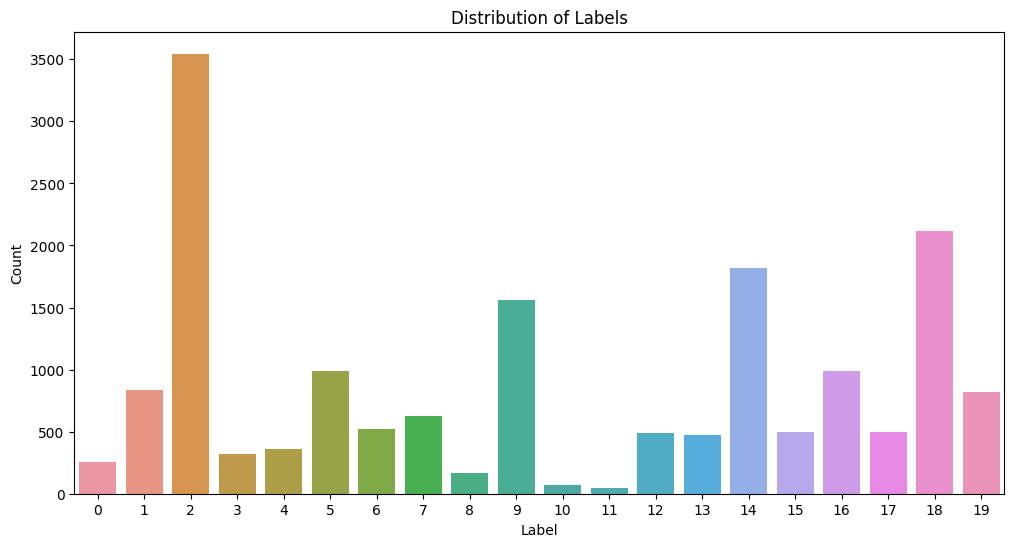

Label Names: ['Analyst Update', 'Company | Product News', 'General News | Opinion', 'Currencies', 'Dividend', 'Earnings', 'Energy | Oil', 'Fed | Central Banks', 'Financials', 'Gold | Metals | Materials', 'IPO', 'Legal | Regulation', 'M&A | Investments', 'Macro', 'Markets', 'Personnel Change', 'Politics', 'Stock Commentary', 'Stock Movement', 'Treasuries | Corporate Debt']


In [7]:
# Distribution of labels
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=finance_train_tweets_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display the distribution of label names
label_names = [label_mapping[label] for label in finance_train_tweets_df['label'].unique()]
print(f"Label Names: {label_names}")

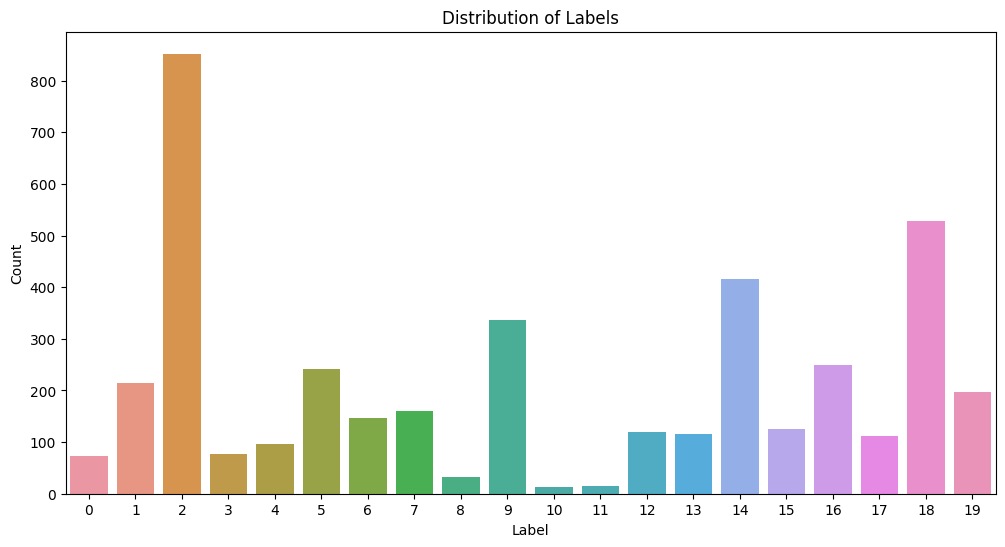

Label Names: ['Analyst Update', 'Company | Product News', 'General News | Opinion', 'Currencies', 'Dividend', 'Earnings', 'Energy | Oil', 'Fed | Central Banks', 'Financials', 'Gold | Metals | Materials', 'IPO', 'Legal | Regulation', 'M&A | Investments', 'Macro', 'Markets', 'Personnel Change', 'Politics', 'Stock Commentary', 'Stock Movement', 'Treasuries | Corporate Debt']


In [8]:
# Distribution of labels
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=finance_valid_tweets_df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display the distribution of label names
label_names = [label_mapping[label] for label in finance_valid_tweets_df['label'].unique()]
print(f"Label Names: {label_names}")

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [10]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)


In [11]:
# Apply text preprocessing to the 'text' column
finance_train_tweets_df['processed_text'] = finance_train_tweets_df['text'].apply(preprocess_text)
finance_valid_tweets_df['processed_text'] = finance_valid_tweets_df['text'].apply(preprocess_text)

In [12]:
finance_train_tweets_df

text  label  \
0      Here are Thursday's biggest analyst calls: App...      0   
1      Buy Las Vegas Sands as travel to Singapore bui...      0   
2      Piper Sandler downgrades DocuSign to sell, cit...      0   
3      Analysts react to Tesla's latest earnings, bre...      0   
4      Netflix and its peers are set for a ‘return to...      0   
...                                                  ...    ...   
16985  KfW credit line for Uniper could be raised to ...      3   
16986  KfW credit line for Uniper could be raised to ...      3   
16987  Russian  https://t.co/R0iPhyo5p7 sells 1 bln r...      3   
16988  Global ESG bond issuance posts H1 dip as supra...      3   
16989  Brazil's Petrobras says it signed a $1.25 bill...      3   

                                          processed_text  
0      thursday biggest analyst call apple amazon tes...  
1      buy la vega sand travel singapore build well f...  
2      piper sandler downgrade docusign sell citing e...  
3      analyst react tesla latest earnings break next...  
4      netflix peer set return growth analyst say giv...  
...                                                  ...  
16985  kfw credit line uniper could raised bln eur ha...  
16986  kfw credit line uniper could raised bln eur ha...  
16987  russian http sell bln rouble repo auction http...  
16988  global esg bond issuance post dip supranationa...  
16989  brazil petrobras say signed billion sustainabi...  

[16990 rows x 3 columns]

In [13]:
# Create TF-IDF vectorizer without setting max_features
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(finance_train_tweets_df['processed_text'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the most frequent terms
max_terms_to_display = 5000
term_frequencies = tfidf_matrix.sum(axis=0).A1
top_terms_indices = term_frequencies.argsort()[-max_terms_to_display:][::-1]
top_terms = [feature_names[i] for i in top_terms_indices]

print(f"Top {max_terms_to_display} Terms: {top_terms}")

Top 5000 Terms: ['http', 'stock', 'market', 'earnings', 'new', 'economy', 'business', 'result', 'inflation', 'quarter', 'say', 'bank', 'second', 'report', 'price', 'trading', 'announces', 'year', 'finance', 'rate', 'stockmarket', 'investing', 'call', 'company', 'financial', 'first', 'china', 'dividend', 'beat', 'investor', 'uk', 'amp', 'share', 'energy', 'revenue', 'global', 'june', 'growth', 'may', 'week', 'oil', 'high', 'sale', 'month', 'billion', 'declares', 'next', 'president', 'fed', 'time', 'wire', 'group', 'could', 'eps', 'day', 'ceo', 'gas', 'fund', 'buy', 'july', 'deal', 'conference', 'back', 'future', 'see', 'higher', 'million', 'via', 'interest', 'data', 'august', 'hike', 'plan', 'open', 'one', 'musk', 'economic', 'supply', 'spy', 'top', 'capital', 'risk', 'point', 'cut', 'raise', 'central', 'dollar', 'technology', 'recession', 'release', 'rise', 'according', 'firm', 'since', 'russia', 'service', 'watch', 'cost', 'european', 'partner', 'investment', 'set', 'biden', 'big', 'h

In [14]:
# Create TF-IDF vectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=4361)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(finance_train_tweets_df['processed_text'])
tfidf_matrix_valid = tfidf_vectorizer.fit_transform(finance_valid_tweets_df['processed_text'])

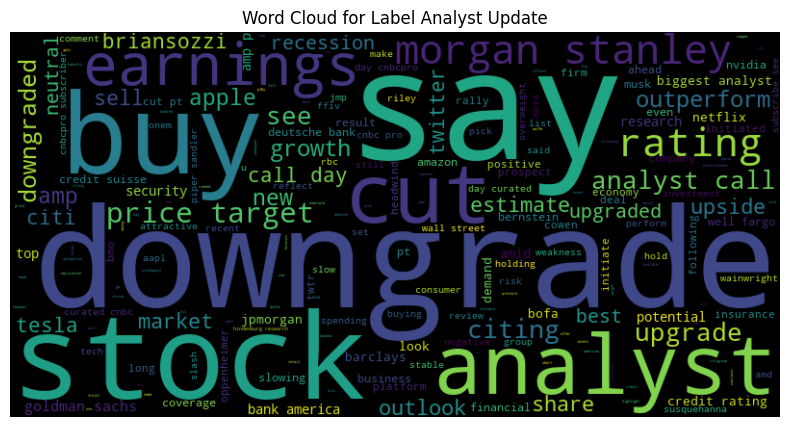

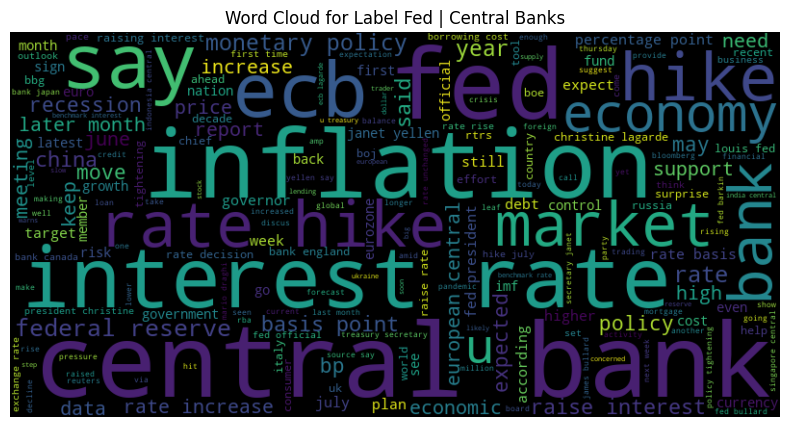

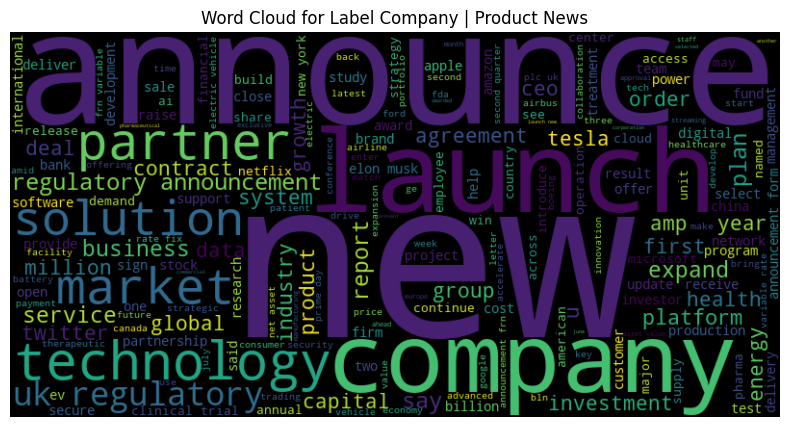

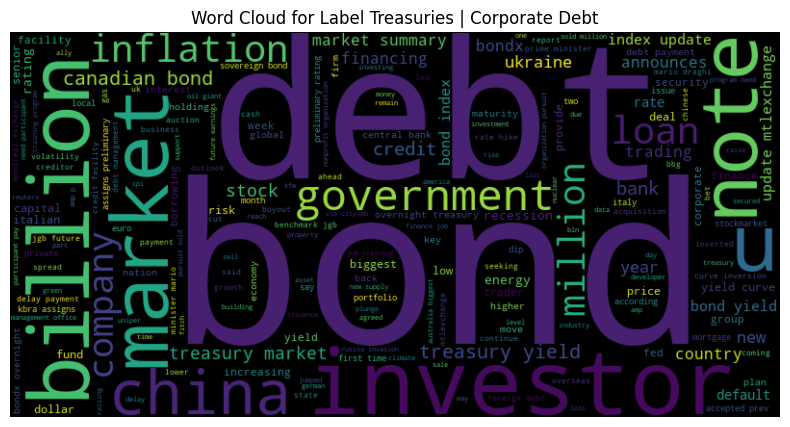

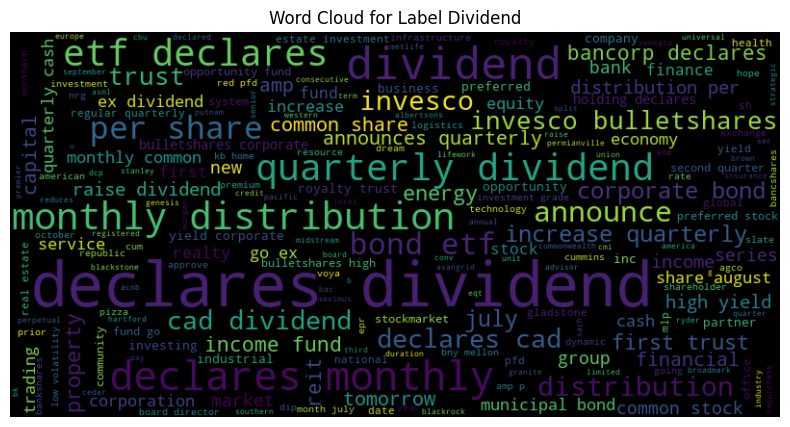

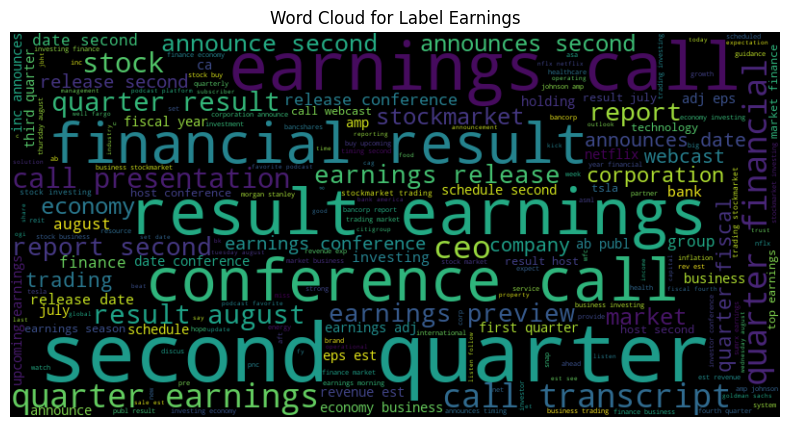

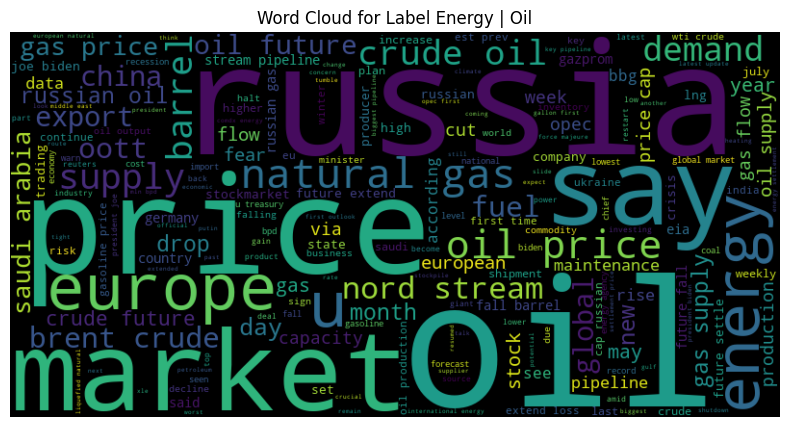

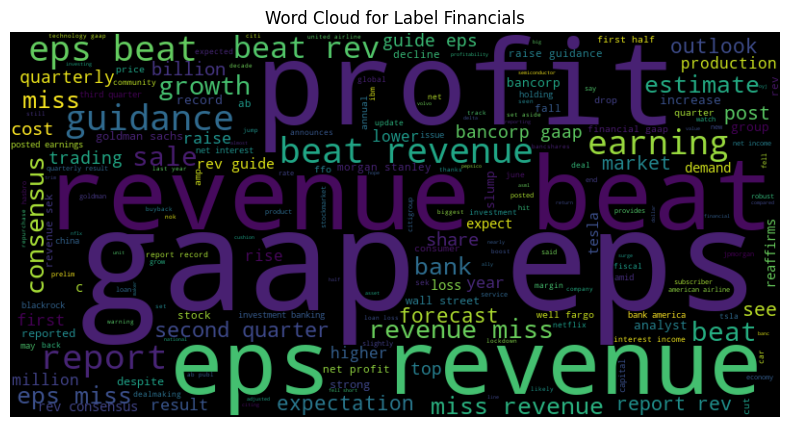

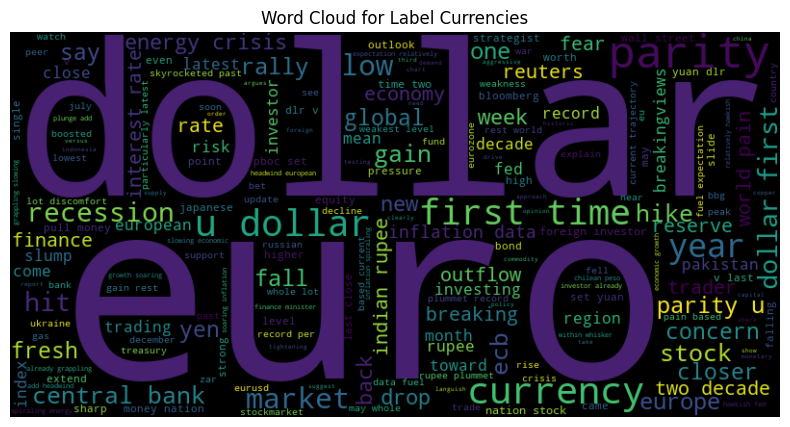

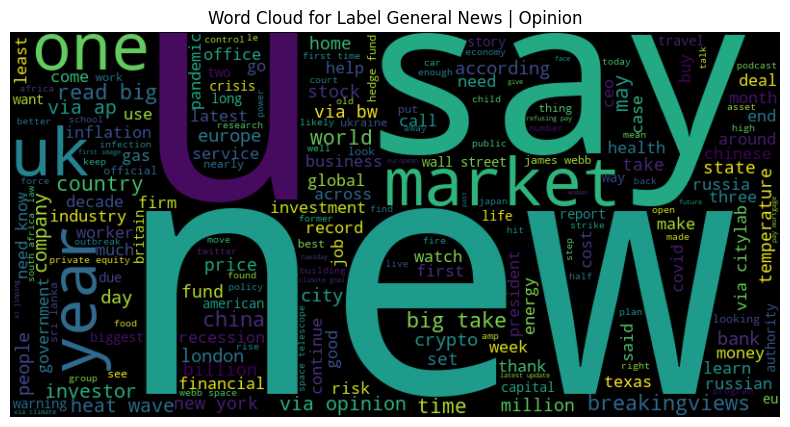

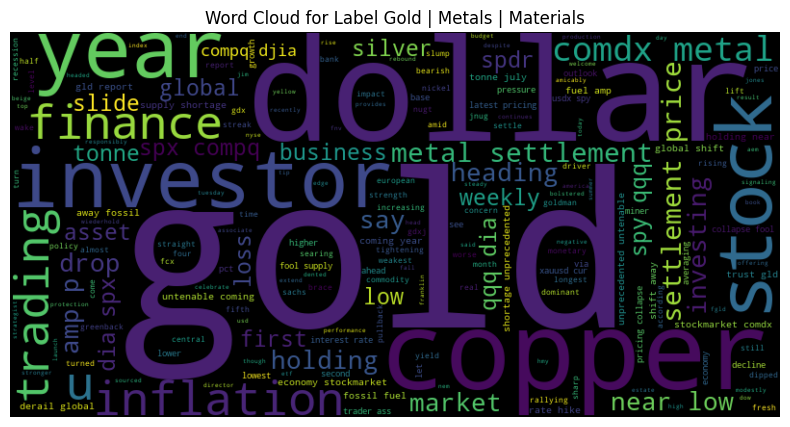

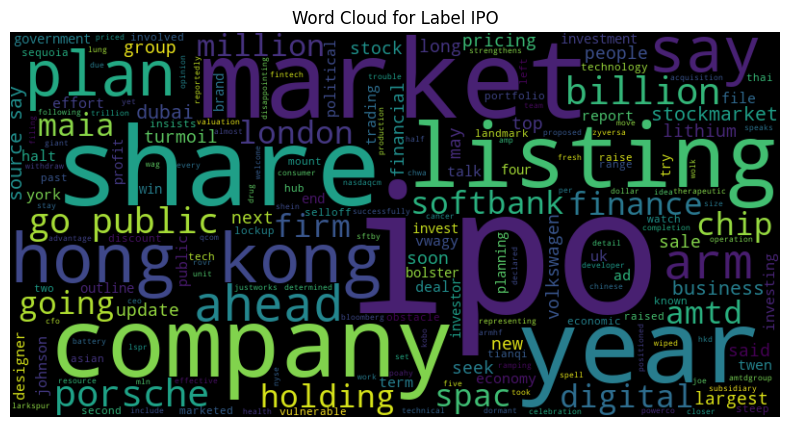

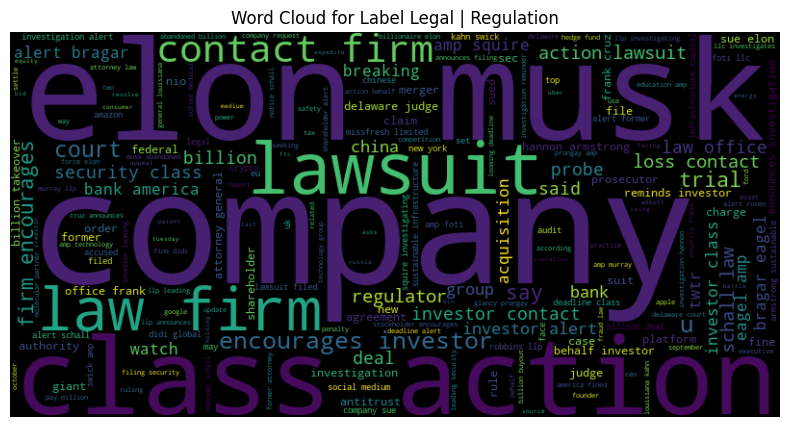

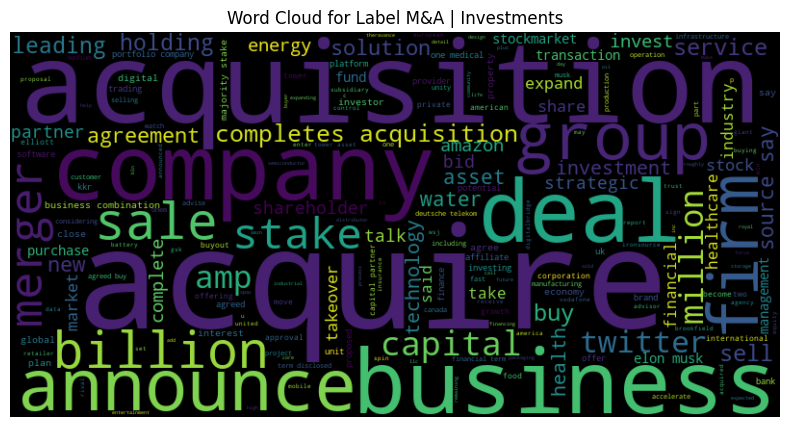

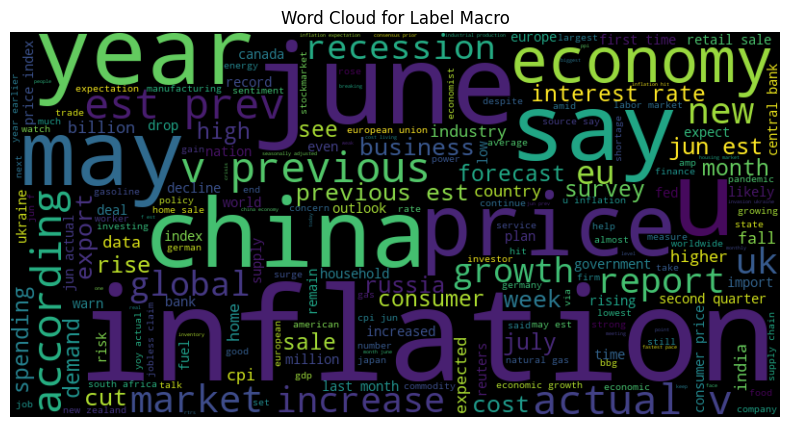

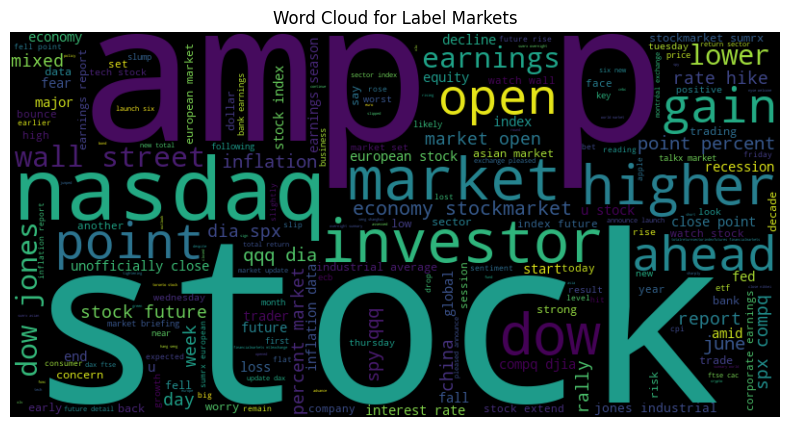

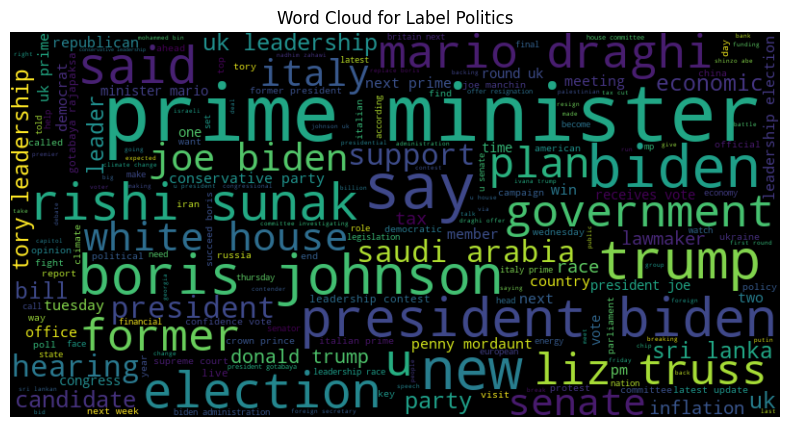

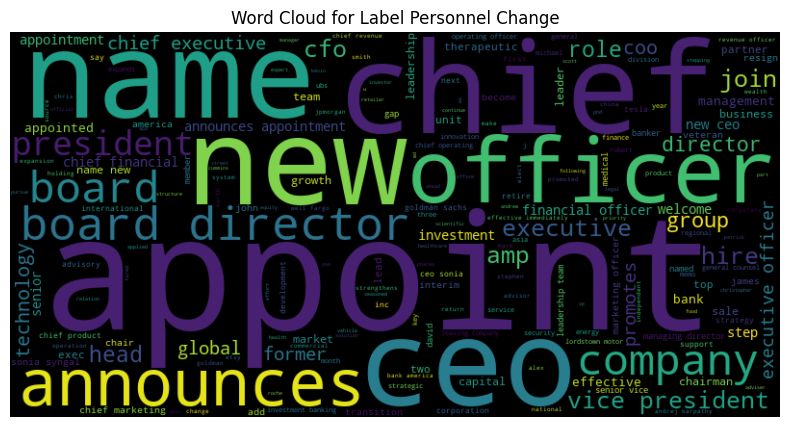

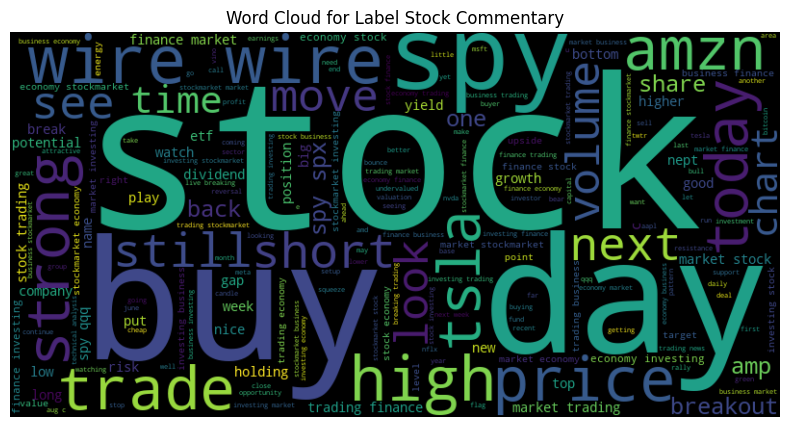

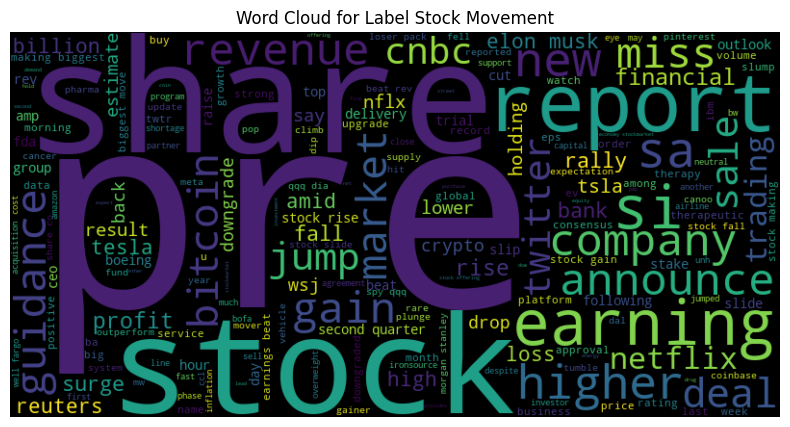

In [15]:
# Generate word clouds for each label
for label in label_mapping:
    subset = finance_train_tweets_df[finance_train_tweets_df['label'] == label]
    text = ' '.join(subset['processed_text'])
    wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label {label_mapping[label]}')
    plt.axis('off')
    plt.show()


In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(
    tfidf_matrix_train,
    finance_train_tweets_df['label'],
    test_size=0.2,
    random_state=42
)

In [17]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predictions on validation set
y_valid_pred = rf_classifier.predict(tfidf_matrix_valid)

# Evaluate the model
print("Classification Report on Validation Set:")
print(classification_report(finance_valid_tweets_df['label'], y_valid_pred, target_names=label_names))
print(f"Accuracy on Validation Set: {accuracy_score(finance_valid_tweets_df['label'], y_valid_pred)}")

Classification Report on Validation Set:
                             precision    recall  f1-score   support

             Analyst Update       0.00      0.00      0.00        73
     Company | Product News       0.20      0.01      0.03       214
     General News | Opinion       0.40      0.03      0.05       852
                 Currencies       0.00      0.00      0.00        77
                   Dividend       0.12      0.01      0.02        97
                   Earnings       0.00      0.00      0.00       242
               Energy | Oil       0.00      0.00      0.00       146
        Fed | Central Banks       0.00      0.00      0.00       160
                 Financials       0.00      0.00      0.00        32
  Gold | Metals | Materials       0.15      0.01      0.02       336
                        IPO       0.00      0.00      0.00        13
         Legal | Regulation       0.00      0.00      0.00        14
          M&A | Investments       0.00      0.00      0.00   

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,